In [3]:
!pip install -q memory_profiler
%load_ext memory_profiler

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.setrecursionlimit(2000)

print("Setup Complete!")

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Setup Complete!


Algorithm Analysis: 
Time Complexity: O(2^n) - Exponential.
Space Complexity: O(n) - Linear, due to recursion stack depth.

Demonstration:
The 10th Fibonacci number is: 55
------------------------------


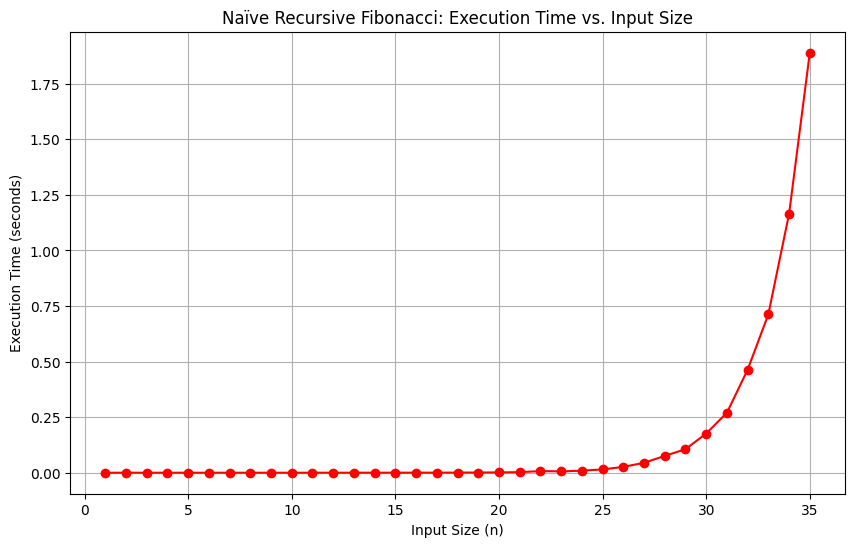


Memory Profile for n=30:
Memory used for fibonacci_recursive(30): 0.00390625 MiB


In [2]:
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Fibonacci (Naïve Recursive)
def fib_recursive(n):
    if n <= 1:
        return n
    else:
        return fib_recursive(n - 1) + fib_recursive(n - 2)

print("Algorithm Analysis: ")
print("Time Complexity: O(2^n) - Exponential.")
print("Space Complexity: O(n) - Linear, due to recursion stack depth.\n")

print("Demonstration:")
n_demo = 10
print(f"The {n_demo}th Fibonacci number is: {fib_recursive(n_demo)}")
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = range(1, 36)
execution_times = []

for n in input_sizes:
    start_time = time.time()
    fib_recursive(n)
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-', color='r')
plt.title('Naïve Recursive Fibonacci: Execution Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

print("\nMemory Profile for n=30:")
# Memory profiling using memory_usage instead of %memit
mem_usage = memory_usage((fib_recursive, (30,)))
print(f"Memory used for fibonacci_recursive(30): {max(mem_usage) - min(mem_usage)} MiB")


Algorithm Analysis: 
Time Complexity: O(n) - Linear.
Space Complexity: O(n) - Linear (can be optimized to O(1)).

Demonstration:
The 20th Fibonacci number is: 6765
------------------------------


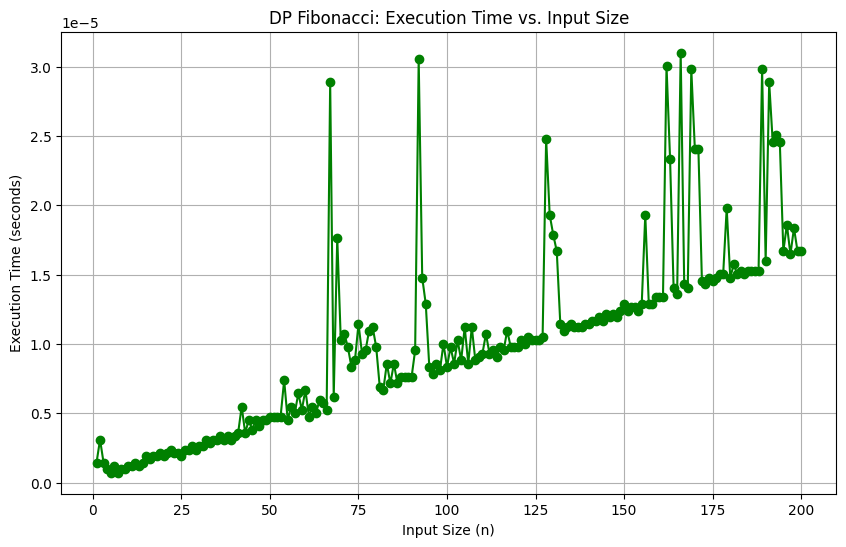


Memory Profile for n=200:
peak memory: 117.48 MiB, increment: 0.33 MiB


In [5]:
# Fibonacci (Dynamic Programming)

def f_dp(n):
    """Calculates the n-th Fibonacci number using dynamic programming (tabulation)."""
    if n <= 1:
        return n
    fib_table = [0] * (n + 1)
    fib_table[1] = 1
    for i in range(2, n + 1):
        fib_table[i] = fib_table[i - 1] + fib_table[i - 2]
    return fib_table[n]

print("Algorithm Analysis: ")
print("Time Complexity: O(n) - Linear.")
print("Space Complexity: O(n) - Linear (can be optimized to O(1)).\n")

print("Demonstration:")
n_demo = 20
print(f"The {n_demo}th Fibonacci number is: {f_dp(n_demo)}")
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = range(1, 201)
execution_times = []
for n in input_sizes:
    start_time = time.time()
    f_dp(n)
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-', color='g')
plt.title('DP Fibonacci: Execution Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

print("\nMemory Profile for n=200:")
%memit f_dp(200)

Algorithm Analysis: 
Time Complexity: O(n log n) for all cases (Best, Average, Worst).
Space Complexity: O(n) - Linear, for temporary arrays.

Demonstration:
Original list: [64, 34, 25, 12, 22, 11, 90]
Sorted list:   [11, 12, 22, 25, 34, 64, 90]
------------------------------


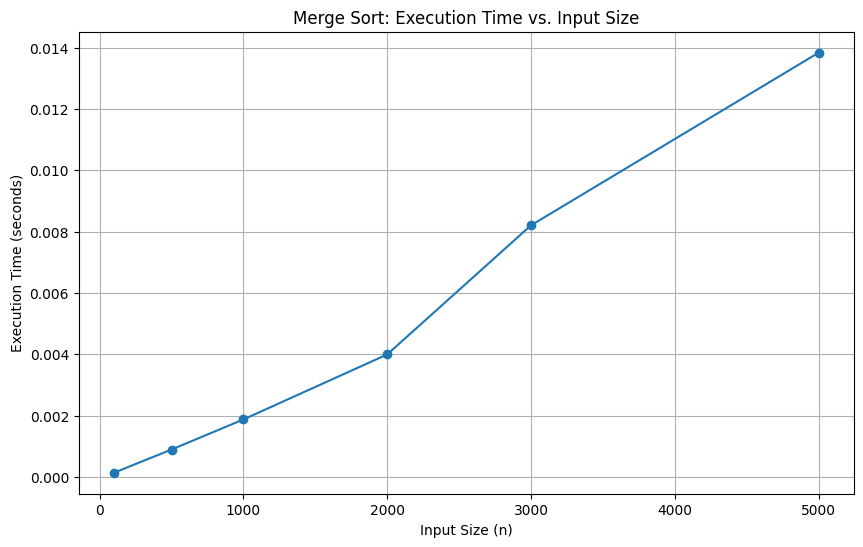


Memory Profile for a list of size 5000:
peak memory: 117.51 MiB, increment: 0.00 MiB


In [6]:
# Merge Sort

def m_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half, right_half = arr[:mid], arr[mid:]
        m_sort(left_half)
        m_sort(right_half)
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]: arr[k] = left_half[i]; i += 1
            else: arr[k] = right_half[j]; j += 1
            k += 1
        while i < len(left_half): arr[k] = left_half[i]; i += 1; k += 1
        while j < len(right_half): arr[k] = right_half[j]; j += 1; k += 1
    return arr

print("Algorithm Analysis: ")
print("Time Complexity: O(n log n) for all cases (Best, Average, Worst).")
print("Space Complexity: O(n) - Linear, for temporary arrays.\n")

print("Demonstration:")
demo_list = [64, 34, 25, 12, 22, 11, 90]
print("Original list:", demo_list)
sorted_demo_list = m_sort(demo_list.copy())
print("Sorted list:  ", sorted_demo_list)
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = [100, 500, 1000, 2000, 3000, 5000]
execution_times = []
for size in input_sizes:
    test_list = [random.randint(0, size) for _ in range(size)]
    start_time = time.time()
    m_sort(test_list.copy())
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-')
plt.title('Merge Sort: Execution Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

sample_list = [random.randint(0, 5000) for _ in range(5000)]
print("\nMemory Profile for a list of size 5000:")
%memit m_sort(sample_list.copy())


Algorithm Analysis: 
Time Complexity: Average O(n log n), Worst O(n^2).
Space Complexity: Average O(log n), Worst O(n).

Demonstration:
Original list: [10, 7, 8, 9, 1, 5]
Sorted list:   [1, 5, 7, 8, 9, 10]
------------------------------


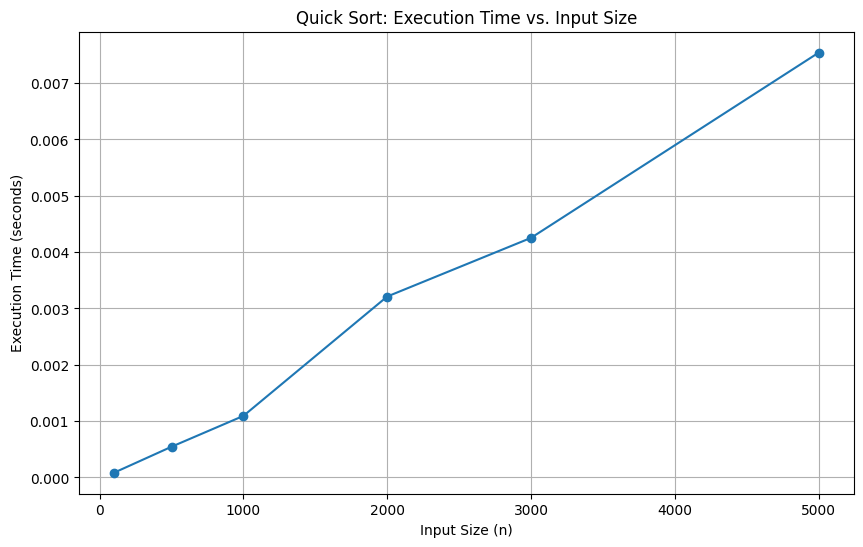


Memory Profile for a list of size 5000:
peak memory: 117.51 MiB, increment: 0.00 MiB


In [7]:
# Quick Sort

def quick_sort_partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort_recursive(arr, low, high):
    if low < high:
        pi = quick_sort_partition(arr, low, high)
        quick_sort_recursive(arr, low, pi - 1)
        quick_sort_recursive(arr, pi + 1, high)

def quick_sort(arr):
    quick_sort_recursive(arr, 0, len(arr) - 1)
    return arr

print("Algorithm Analysis: ")
print("Time Complexity: Average O(n log n), Worst O(n^2).")
print("Space Complexity: Average O(log n), Worst O(n).\n")

print("Demonstration:")
demo_list = [10, 7, 8, 9, 1, 5]
print("Original list:", demo_list)
sorted_demo_list = demo_list.copy()
quick_sort(sorted_demo_list)
print("Sorted list:  ", sorted_demo_list)
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = [100, 500, 1000, 2000, 3000, 5000]
execution_times = []
for size in input_sizes:
    test_list = [random.randint(0, size) for _ in range(size)]
    start_time = time.time()
    quick_sort(test_list.copy())
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-')
plt.title('Quick Sort: Execution Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

sample_list = [random.randint(0, 5000) for _ in range(5000)]
print("\nMemory Profile for a list of size 5000:")
%memit quick_sort(sample_list.copy())

Algorithm Analysis: 
Time Complexity: Average O(n^2), Best O(n).
Space Complexity: O(1) - Constant (in-place).

Demonstration:
Original list: [64, 34, 25, 12, 22, 11, 90]
Sorted list:   [11, 12, 22, 25, 34, 64, 90]
------------------------------


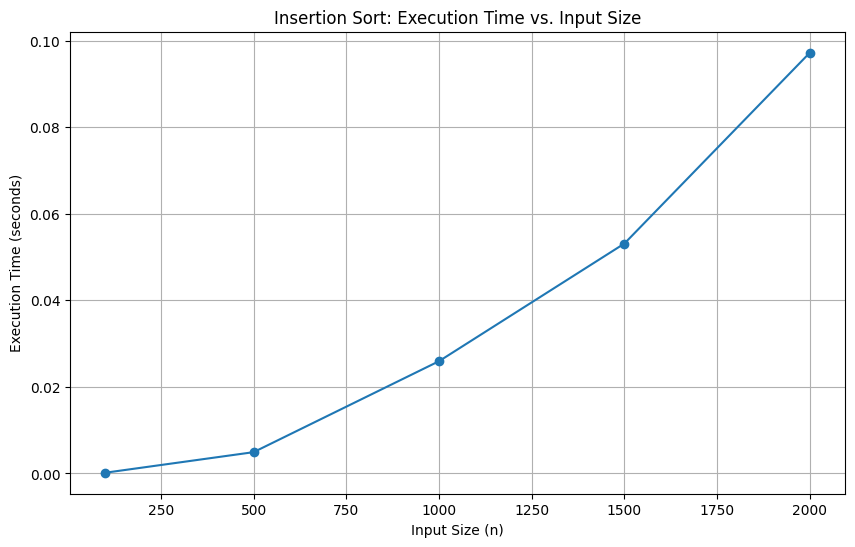


Memory Profile for a list of size 2000:
peak memory: 117.52 MiB, increment: 0.00 MiB


In [8]:
# Insertion Sort

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

print("Algorithm Analysis: ")
print("Time Complexity: Average O(n^2), Best O(n).")
print("Space Complexity: O(1) - Constant (in-place).\n")

print("Demonstration:")
demo_list = [64, 34, 25, 12, 22, 11, 90]
print("Original list:", demo_list)
insertion_sort(demo_list)
print("Sorted list:  ", demo_list)
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = [100, 500, 1000, 1500, 2000]
execution_times = []
for size in input_sizes:
    test_list = [random.randint(0, size) for _ in range(size)]
    start_time = time.time()
    insertion_sort(test_list.copy())
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-')
plt.title('Insertion Sort: Execution Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

sample_list = [random.randint(0, 2000) for _ in range(2000)]
print("\nMemory Profile for a list of size 2000:")
%memit insertion_sort(sample_list.copy())

Algorithm Analysis: 
Time Complexity: Average O(n^2), Best O(n) (with optimization).
Space Complexity: O(1) - Constant (in-place).

Demonstration:
Original list: [64, 34, 25, 12, 22, 11, 90]
Sorted list:   [11, 12, 22, 25, 34, 64, 90]
------------------------------


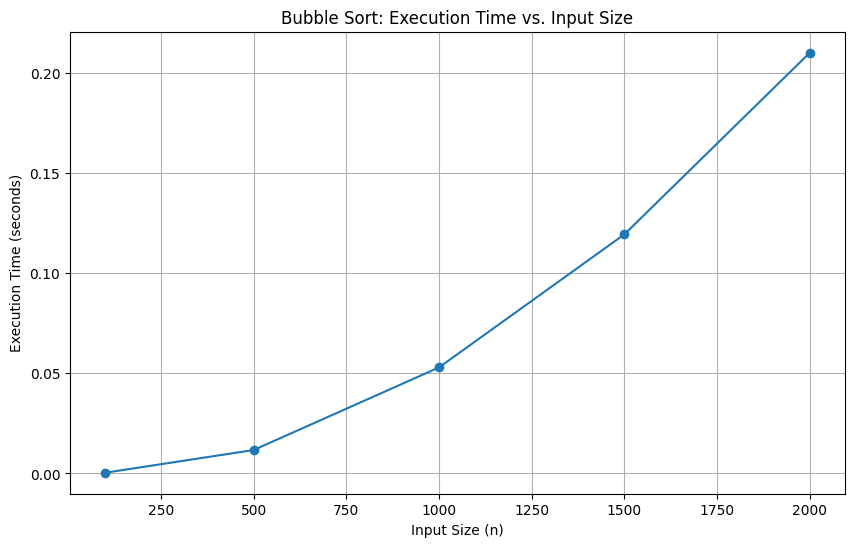


Memory Profile for a list of size 2000:
peak memory: 117.52 MiB, increment: 0.00 MiB


In [9]:
# Bubble Sort

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

print("Algorithm Analysis: ")
print("Time Complexity: Average O(n^2), Best O(n) (with optimization).")
print("Space Complexity: O(1) - Constant (in-place).\n")

print("Demonstration:")
demo_list = [64, 34, 25, 12, 22, 11, 90]
print("Original list:", demo_list)
bubble_sort(demo_list)
print("Sorted list:  ", demo_list)
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = [100, 500, 1000, 1500, 2000]
execution_times = []
for size in input_sizes:
    test_list = [random.randint(0, size) for _ in range(size)]
    start_time = time.time()
    bubble_sort(test_list.copy())
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-')
plt.title('Bubble Sort: Execution Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

sample_list = [random.randint(0, 2000) for _ in range(2000)]
print("\nMemory Profile for a list of size 2000:")
%memit bubble_sort(sample_list.copy())

Algorithm Analysis: 
Time Complexity: O(n^2) for all cases (Best, Average, Worst).
Space Complexity: O(1) - Constant (in-place).

Demonstration:
Original list: [64, 25, 12, 22, 11]
Sorted list:   [11, 12, 22, 25, 64]
------------------------------


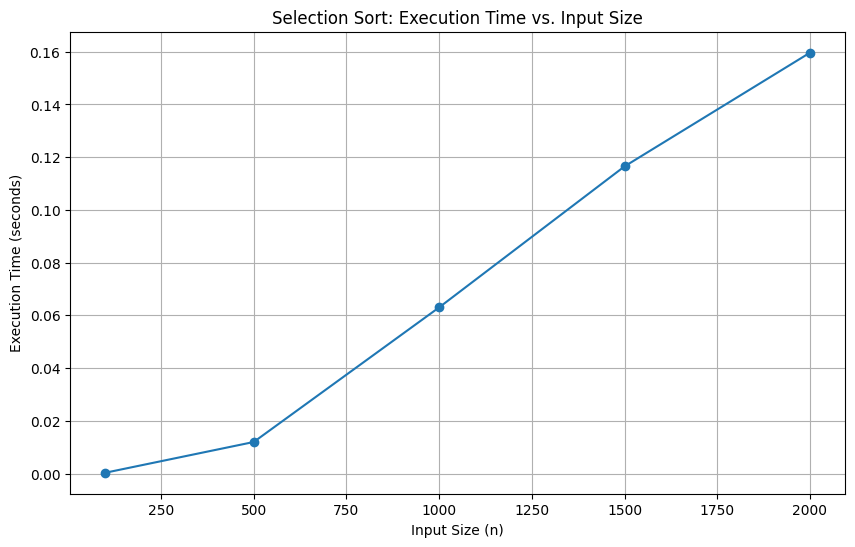


Memory Profile for a list of size 2000:
peak memory: 117.52 MiB, increment: 0.00 MiB


In [10]:
# Selection Sort

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

print("Algorithm Analysis: ")
print("Time Complexity: O(n^2) for all cases (Best, Average, Worst).")
print("Space Complexity: O(1) - Constant (in-place).\n")

print("Demonstration:")
demo_list = [64, 25, 12, 22, 11]
print("Original list:", demo_list)
selection_sort(demo_list)
print("Sorted list:  ", demo_list)
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = [100, 500, 1000, 1500, 2000]
execution_times = []
for size in input_sizes:
    test_list = [random.randint(0, size) for _ in range(size)]
    start_time = time.time()
    selection_sort(test_list.copy())
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-')
plt.title('Selection Sort: Execution Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

sample_list = [random.randint(0, 2000) for _ in range(2000)]
print("\nMemory Profile for a list of size 2000:")
%memit selection_sort(sample_list.copy())

Algorithm Analysis: 
Time Complexity: Average O(log n), Best O(1).
Space Complexity: O(1) for this iterative version.

Demonstration:
Searching in list: [2, 5, 7, 8, 11, 12, 25, 30]
Index of 11: 4
Index of 6: -1
------------------------------


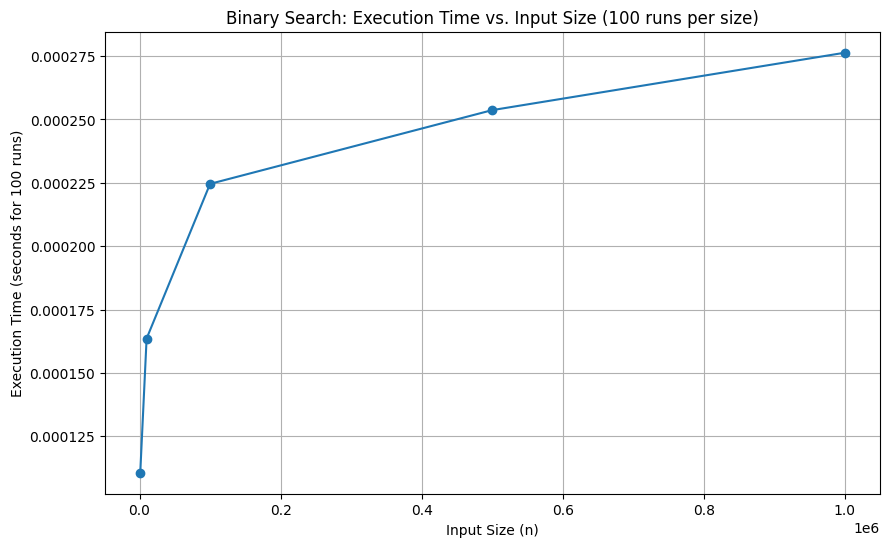


Memory Profile for a list of size 1,000,000:
peak memory: 191.78 MiB, increment: 0.00 MiB


In [11]:
# Binary Search

def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target: return mid
        elif arr[mid] < target: low = mid + 1
        else: high = mid - 1
    return -1 # Not found

print("Algorithm Analysis: ")
print("Time Complexity: Average O(log n), Best O(1).")
print("Space Complexity: O(1) for this iterative version.\n")

print("Demonstration:")
demo_list = [2, 5, 7, 8, 11, 12, 25, 30]
target1 = 11
target2 = 6
print(f"Searching in list: {demo_list}")
print(f"Index of {target1}: {binary_search(demo_list, target1)}")
print(f"Index of {target2}: {binary_search(demo_list, target2)}")
print("-" * 30)

# Experimental Profiling & Visualization
input_sizes = [1000, 10000, 100000, 500000, 1000000]
execution_times = []
for size in input_sizes:
    sorted_list = list(range(size))
    target = -1 # Worst case
    start_time = time.time()
    for _ in range(100): # Run multiple times to get a measurable time
        binary_search(sorted_list, target)
    end_time = time.time()
    execution_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-')
plt.title('Binary Search: Execution Time vs. Input Size (100 runs per size)')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds for 100 runs)')
plt.grid(True)
plt.show()

sample_list = list(range(1000000))
print("\nMemory Profile for a list of size 1,000,000:")
%memit binary_search(sample_list, -1)

<>:75: SyntaxWarning: invalid escape sequence '\l'
<>:76: SyntaxWarning: invalid escape sequence '\l'
<>:75: SyntaxWarning: invalid escape sequence '\l'
<>:76: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2168183009.py:75: SyntaxWarning: invalid escape sequence '\l'
  "Merge Sort ($O(n \log n)$)": merge_sort,
/tmp/ipython-input-2168183009.py:76: SyntaxWarning: invalid escape sequence '\l'
  "Quick Sort ($O(n \log n)$)": quick_sort


Running comparative analysis... (This may take a moment)
  Testing with list size: 100
  Testing with list size: 250
  Testing with list size: 500
  Testing with list size: 1000
  Testing with list size: 2000
Analysis complete.


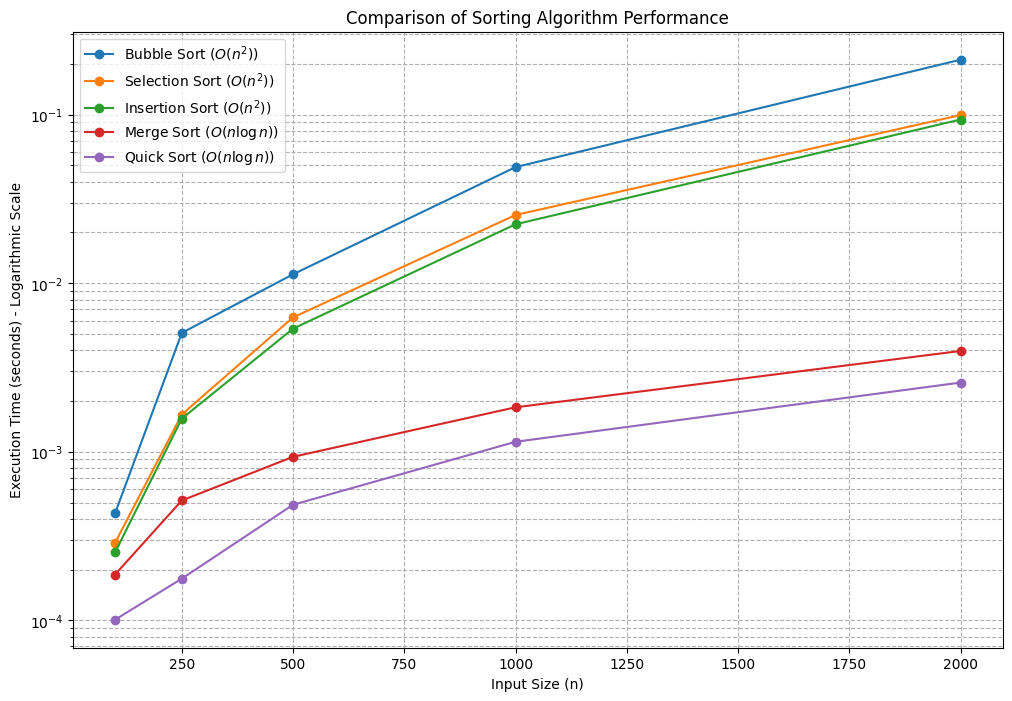

In [12]:
#Comparative Analysis of All Sorting Algorithms

import time
import random
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(5000)

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half, right_half = arr[:mid], arr[mid:]
        merge_sort(left_half)
        merge_sort(right_half)
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]: arr[k] = left_half[i]; i += 1
            else: arr[k] = right_half[j]; j += 1
            k += 1
        while i < len(left_half): arr[k] = left_half[i]; i += 1; k += 1
        while j < len(right_half): arr[k] = right_half[j]; j += 1; k += 1
    return arr

def quick_sort(arr):
    def _quick_sort_recursive(arr, low, high):
        if low < high:
            pi = _partition(arr, low, high)
            _quick_sort_recursive(arr, low, pi - 1)
            _quick_sort_recursive(arr, pi + 1, high)
    def _partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1
    _quick_sort_recursive(arr, 0, len(arr) - 1)
    return arr


algorithms = {
    "Bubble Sort ($O(n^2)$)": bubble_sort,
    "Selection Sort ($O(n^2)$)": selection_sort,
    "Insertion Sort ($O(n^2)$)": insertion_sort,
    "Merge Sort ($O(n \log n)$)": merge_sort,
    "Quick Sort ($O(n \log n)$)": quick_sort
}

input_sizes = [100, 250, 500, 1000, 2000]
results = {name: [] for name in algorithms}

print("Running comparative analysis... (This may take a moment)")
for size in input_sizes:
    print(f"  Testing with list size: {size}")
    # Use the same random list for all algorithms at a given size for a fair comparison
    test_list = [random.randint(0, size) for _ in range(size)]
    for name, algo_func in algorithms.items():
        list_copy = test_list.copy()
        start_time = time.time()
        algo_func(list_copy)
        end_time = time.time()
        results[name].append(end_time - start_time)
print("Analysis complete.")


plt.figure(figsize=(12, 8))
for name, times in results.items():
    plt.plot(input_sizes, times, marker='o', linestyle='-', label=name)

plt.title('Comparison of Sorting Algorithm Performance')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds) - Logarithmic Scale')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.yscale('log') # ogarithmic scale to see all results clearly
plt.show()